In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM cryptocom_coin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Crypto.com Coin,CRO,2018-12-15 23:59:59,0.019845,0.016150,0.019542,0.017243,9.897096e+05,0.000000e+00
1,2,Crypto.com Coin,CRO,2018-12-16 23:59:59,0.017496,0.014127,0.017213,0.015301,7.171740e+05,0.000000e+00
2,3,Crypto.com Coin,CRO,2018-12-17 23:59:59,0.016723,0.011487,0.015186,0.014448,6.156226e+05,1.547062e+07
3,4,Crypto.com Coin,CRO,2018-12-18 23:59:59,0.017215,0.013553,0.014308,0.016260,7.644745e+05,1.785590e+07
4,5,Crypto.com Coin,CRO,2018-12-19 23:59:59,0.031509,0.015609,0.016087,0.020790,1.025196e+06,2.340088e+07


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        935 non-null    object 
 1   Symbol      935 non-null    object 
 2   Date        935 non-null    object 
 3   High        935 non-null    float64
 4   Low         935 non-null    float64
 5   Open        935 non-null    float64
 6   Close       935 non-null    float64
 7   Volume      935 non-null    float64
 8   Marketcap   935 non-null    float64
 9   Range       935 non-null    float64
 10  Difference  935 non-null    float64
dtypes: float64(8), object(3)
memory usage: 80.5+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        935 non-null    object        
 1   Symbol      935 non-null    object        
 2   Date        935 non-null    datetime64[ns]
 3   High        935 non-null    float64       
 4   Low         935 non-null    float64       
 5   Open        935 non-null    float64       
 6   Close       935 non-null    float64       
 7   Volume      935 non-null    float64       
 8   Marketcap   935 non-null    float64       
 9   Range       935 non-null    float64       
 10  Difference  935 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 80.5+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,935.000000,935.000000,935.000000,935.000000,9.350000e+02,9.350000e+02,935.000000,935.000000
mean,0.085467,0.078565,0.081802,0.081912,5.003678e+07,1.485326e+09,0.006903,0.000110
std,0.055912,0.051567,0.053707,0.053693,9.611248e+07,1.456005e+09,0.009089,0.006546
min,0.012463,0.011487,0.012164,0.012133,7.388051e+04,0.000000e+00,0.000197,-0.057982
25%,0.042306,0.039469,0.040979,0.041072,5.441613e+06,4.003142e+08,0.002115,-0.001533
50%,0.068313,0.062851,0.065295,0.065431,1.699123e+07,7.591310e+08,0.004001,0.000016
75%,0.121664,0.112010,0.115961,0.116189,6.591552e+07,2.549040e+09,0.008442,0.001749
max,0.270960,0.234816,0.246416,0.246848,1.993686e+09,6.236131e+09,0.137603,0.079642


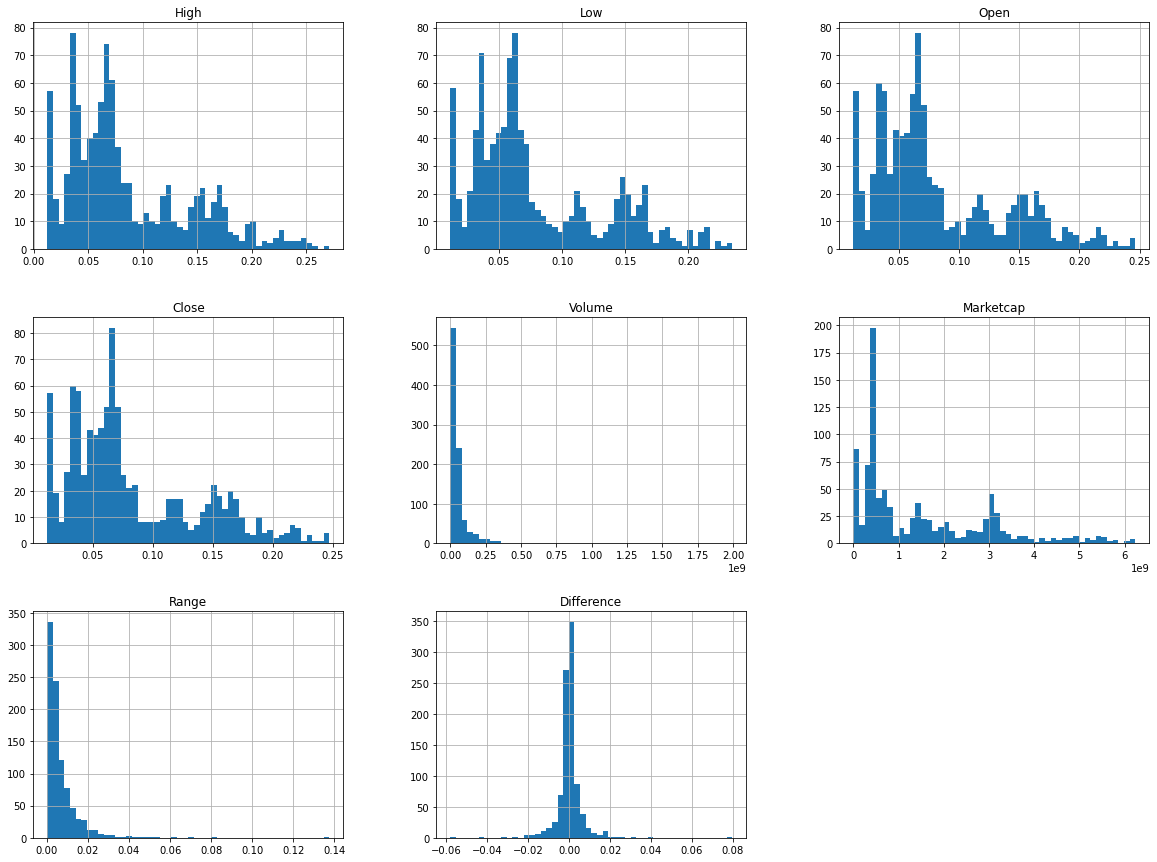

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,801,844,855,826,886,871,877,890,628,879
Date,2021-02-23 23:59:59,2021-04-07 23:59:59,2021-04-18 23:59:59,2021-03-20 23:59:59,2021-05-19 23:59:59,2021-05-04 23:59:59,2021-05-10 23:59:59,2021-05-23 23:59:59,2020-09-03 23:59:59,2021-05-12 23:59:59
Difference,-0.057982,-0.042921,-0.031681,-0.027008,-0.026382,-0.022051,-0.021601,-0.020976,-0.019598,-0.019485


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,800,90,87,891,824,825,796,863,822,872
Date,2021-02-22 23:59:59,2019-03-15 23:59:59,2019-03-12 23:59:59,2021-05-24 23:59:59,2021-03-18 23:59:59,2021-03-19 23:59:59,2021-02-18 23:59:59,2021-04-26 23:59:59,2021-03-16 23:59:59,2021-05-05 23:59:59
Difference,0.079642,0.040491,0.031094,0.025009,0.024224,0.022154,0.019574,0.019056,0.018717,0.018179


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

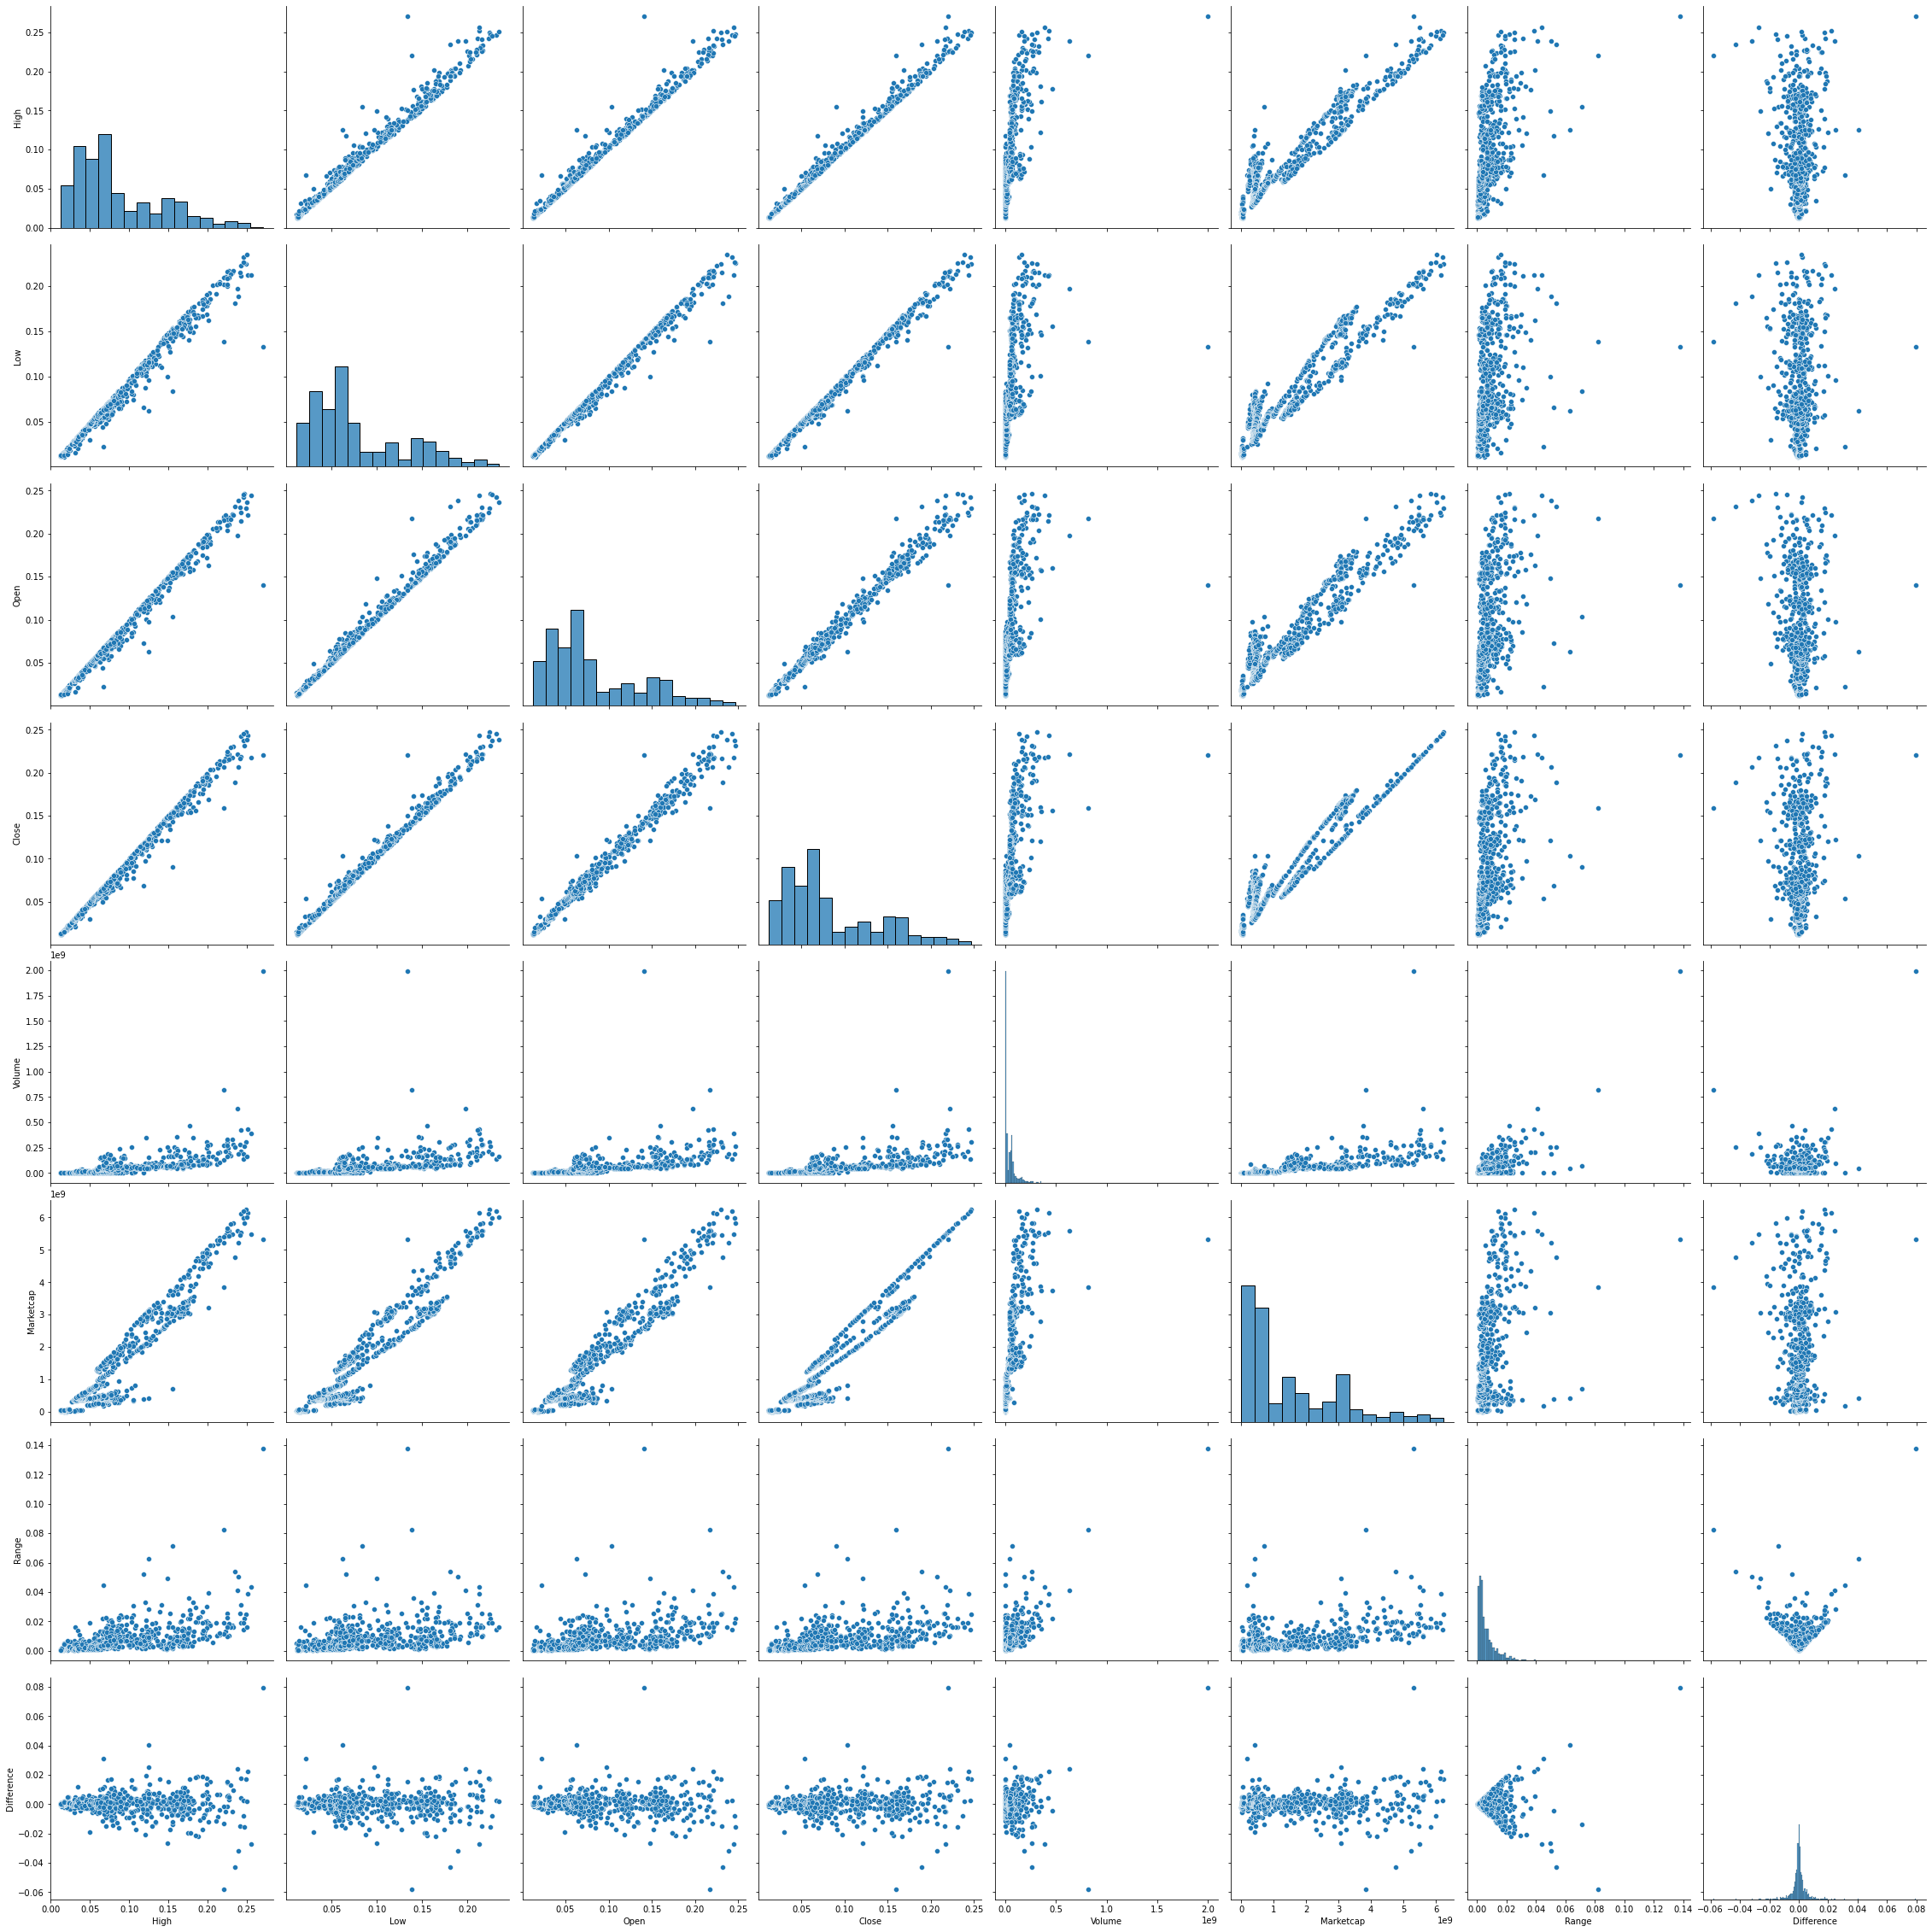

In [15]:
sns.pairplot(data,height=4);
